In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from dotenv import load_dotenv
from sklearn.cluster import KMeans



In [8]:
image_path = '../output_videos/player_1.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

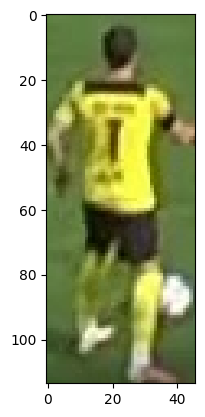

In [9]:
plt.imshow(image)
plt.show()

## Take top half of Image

In [15]:
top_half_image = image[0: int(image.shape[0]/2),:]

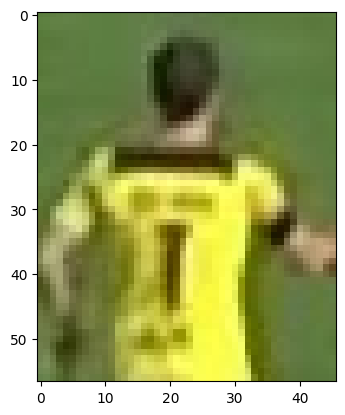

In [16]:
plt.imshow(top_half_image)
plt.show()

## Cluster the image into 2 cluster,  so we can get the dominant color

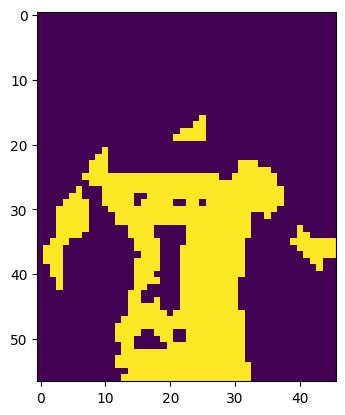

In [23]:
# Reshape the image to be a list of pixels
image_2d = top_half_image.reshape((-1, 3))

# Perform KMeans clustering to find the dominant colors
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

#reshape the lables inot the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

## Segment the image based on the dominant color

In [24]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_clustered = max(set(corner_clusters), key=corner_clusters.count)
print(f'Non player cluster: {non_player_clustered}')

Non player cluster: 0


In [26]:
player_cluster = 1 - non_player_clustered
print(f'Player cluster: {player_cluster}')

Player cluster: 1


In [27]:
kmeans.cluster_centers_[player_cluster]

array([217.62278107, 215.61242604,  85.43343195])